In [3]:
using Serialization
using ProgressMeter, Plots
using QuantumStates, OpticalBlochEquations, DifferentialEquations, UnitsToValue, StructArrays, StaticArrays, Parameters
import Distributions: Normal, Geometric, Exponential
using Distributed

In [4]:
include("helper_functions.jl")
include("define_molecular_structure.jl")
include("define_sim_params.jl")
include("define_prob.jl")
include("compute_size_temperature.jl")

(1.4039225463142502, 0.6203378693016455)

In [6]:
filename = "results/cooling_sim_d300.00d0.00d0.00b1.00s7.31s3.23.jl"
deserialized = deserialize(filename)

200-element Vector{Any}:
 ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, MutableNamedTuple{(:u0, :Γ, :ωs, :ω0s, :eiω0ts, :ϕs, :as, :rs, :kEs, :E_total, :ϵs, :idxs, :denom, :ψ, :dψ, :ψ_q, :sim_params, :d_ge, :d_eg, :F, :d, :d_exp, :d_exp_split, :r, :r_idx, :v_idx, :F_idx, :n_g, :n_excited, :n_states, :m, :add_terms_dψ, :update_params, :decay_dist, :time_to_decay, :last_decay_time, :n_scatters, :diffusion_constant, :add_spontaneous_decay_kick, :add_force_from_hamiltonian, :sats), Tuple{Base.RefValue{Vector{Float64}}, Base.RefValue{Float64}, Base.RefValue{MVector{2, Float64}}, Base.RefValue{MVector{16, Float64}}, Base.RefValue{StructVector{ComplexF64, @NamedTuple{re::MVector{16, Float64}, im::MVector{16, Float64}}, Int64}}, Base.RefValue{MMatrix{3, 5, Float64, 15}}, Base.RefValue{StructArray{ComplexF64, 2, @NamedTuple{re::MMatrix{6, 2, Float64, 12}, im:

In [17]:
function get_value(u, k)
    return abs2(u[k]) + abs2(u[16+k])
end

function get_F1̄(u)
    return get_value(u, 1) + get_value(u, 2) + get_value(u, 3)
end

function get_F0(u)
    return get_value(u, 4)
end

function get_F1(u)
    return get_value(u, 5) + get_value(u, 6) + get_value(u, 7)
end
    
function get_F2(u)
    return get_value(u, 8) + get_value(u, 9) + get_value(u, 10) + 
           get_value(u, 11) + get_value(u, 12)
end

get_F2 (generic function with 1 method)

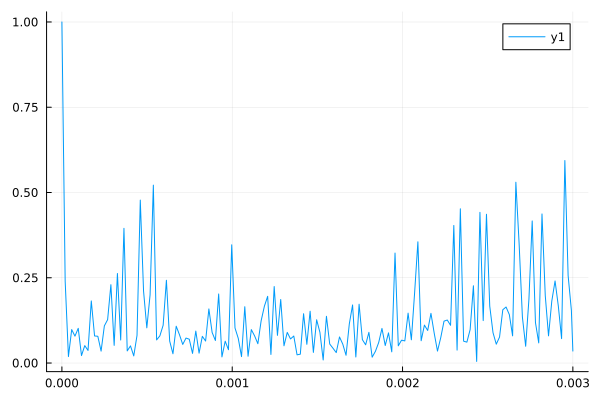

In [24]:
# xs = get_F0.(deserialized[1].u) + get_F1.(deserialized[1].u) + get_F2.(deserialized[1].u) + get_F1̄.(deserialized[1].u)
# xs = get_F0.(deserialized[1].u) + get_F1.(deserialized[1].u)
# xs = get_F2.(deserialized[1].u) 
xs = get_F1̄.(deserialized[1].u)

plot(deserialized[1].t ./ Γ,xs)